In [7]:
import pandas as pd
import numpy as np
from statsmodels.tools.eval_measures import mse,aic,bic
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import jarque_bera
from Machine_Learning_Tools.plots import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
X_train = pd.read_csv('datasets/X_train.csv')
y_train = pd.read_csv('datasets/y_train.csv')

In [5]:
X_train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [15]:
X_train = X_train.drop('carID',axis=1)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4960 non-null   object 
 1   model         4960 non-null   object 
 2   year          4960 non-null   int64  
 3   transmission  4960 non-null   object 
 4   mileage       4960 non-null   int64  
 5   fuelType      4960 non-null   object 
 6   tax           4960 non-null   float64
 7   mpg           4960 non-null   float64
 8   engineSize    4960 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 348.9+ KB


In [17]:
X_train.describe()

,year,mileage,tax,mpg,engineSize
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,2016.737903,24956.286895,152.332661,50.370766,2.124375
std,2.884035,24443.333662,82.403844,35.746505,0.789368
min,1997.000000,1.000000,0.000000,2.800000,0.000000
25%,2016.000000,5641.250000,145.000000,38.700000,1.600000
50%,2017.000000,19000.000000,145.000000,47.100000,2.000000
75%,2019.000000,36702.000000,150.000000,54.300000,2.800000
max,2020.000000,259000.000000,580.000000,470.800000,6.600000


In [18]:
categorical_features = X_train.columns[X_train.dtypes=='object']
numeric_features = X_train.columns[X_train.dtypes!='object']

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

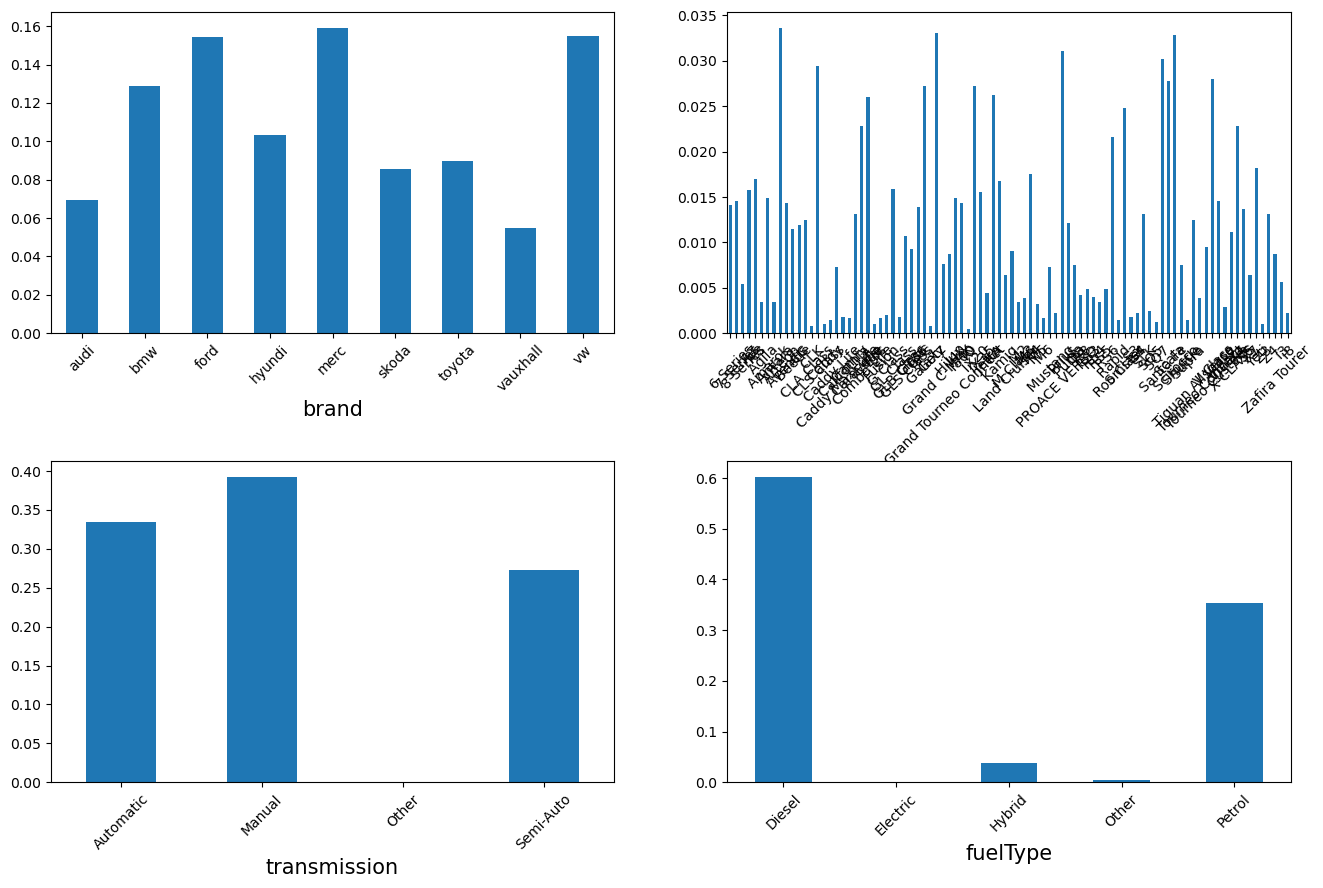

In [21]:
barplot1(X_train,categorical_features,figsize=(16,10))

In [25]:
boxplot1(X_train,'')

Signature:
boxplot1(
    data,
    y,
    col,
    rows=2,
    cols=2,
    figsize=(10, 5),
    label_size=15,
    xticks_size=10,
    hspace=0.4,
    wspace=None,
    rotation=45,
)
Docstring: <no docstring>
File:      c:\users\gaming\documents\proyectos_python\machine_learning_proyects\regression_models\used_car_price_prediction\machine_learning_tools\plots.py
Type:      function


In [27]:
y_train

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
...,...,...
4955,16898,17999
4956,14416,28900
4957,15453,8998
4958,14666,23198
